In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df3 = pd.read_csv('https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/master/Week04-workshop-1/data.txt',sep=',')
df3.head()
df3.shape

(47, 3)

In [4]:
x = df3.iloc[:,0:-1] #1:3
x.head(5)

,area,rooms
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [5]:
y = df3.iloc[:,-1:] # 3
y.head(5)

,price
0,399900
1,329900
2,369000
3,232000
4,539900


In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[  139.21067402 -8738.01911233]]
[89597.9095428]


In [7]:
# initialize list of lists
X_test = [[3500 , 6]]
  
# Create the pandas DataFrame
df4 = pd.DataFrame(X_test, columns = ['area', 'rooms'])

predicted_price = lin_reg.predict(df4)
print(predicted_price)

# Declare a list that is to be converted into a column
price = predicted_price
 
# Using 'Address' as the column name
# and equating it to the list
df4['price'] = price

df5 = pd.concat([df3, df4], ignore_index = True, axis = 0)
df5

[[524407.15393052]]


,area,rooms,price
0,2104,3,399900.000000
1,1600,3,329900.000000
2,2400,3,369000.000000
3,1416,2,232000.000000
4,3000,4,539900.000000
5,1985,4,299900.000000
6,1534,3,314900.000000
7,1427,3,198999.000000
8,1380,3,212000.000000
9,1494,3,242500.000000


In [8]:
import plotly.express as px

fig = px.scatter(df5, x="area", y="price", trendline="ols")
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



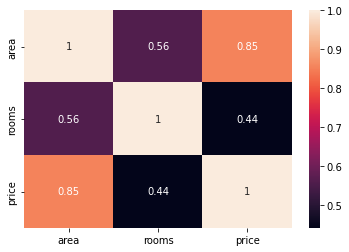

In [9]:
import seaborn as sns

Var_Corr = df3.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

# Polynomial regression
Reference: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

In [10]:


# Importing the dataset
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
print(dataset.head)

<bound method NDFrame.head of             Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000>


In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

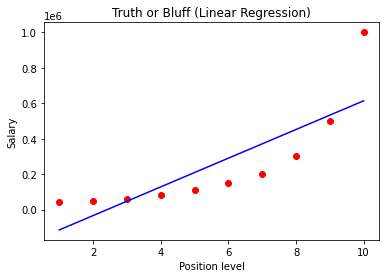

In [12]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

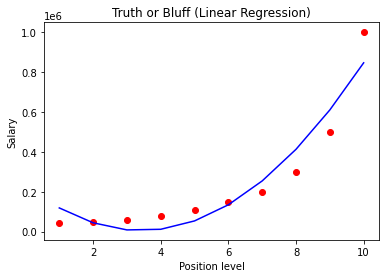

In [13]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [14]:
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])
#output should be 249500

# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))
#output should be 132148.43750003

array([89187.5])